In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/googleplaystore.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df.head() # display first 5 rows in the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info() #display data types and null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.shape # total data rows and columns

(10841, 13)

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [11]:
df_cleaned = df.copy()
# Replace string 'NaN' with actual NaN
df_cleaned.replace('NaN', np.nan, inplace=True)
# Clean numeric columns
df_cleaned['Reviews'] = pd.to_numeric(df_cleaned['Reviews'], errors='coerce')
df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('[+,]', '', regex=True)
df_cleaned['Installs'] = pd.to_numeric(df_cleaned['Installs'], errors='coerce')
df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '', regex=False)
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

# Standardize Size column
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    if 'M' in size:
        return float(size.replace('M', '')) * 1024
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return np.nan

df_cleaned['Size'] = df_cleaned['Size'].apply(convert_size)

# Fill missing numeric values with median
for col in ['Rating', 'Reviews', 'Installs', 'Price', 'Size']:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in ['Type', 'Content Rating', 'Android Ver', 'Current Ver']:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

<ipython-input-11-2c2abc2b54b1>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
<ipython-input-11-2c2abc2b54b1>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [13]:
print("Missing Values:")
df_cleaned.isnull().sum()

Missing Values:


,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0



--- Distribution of Numerical Features ---


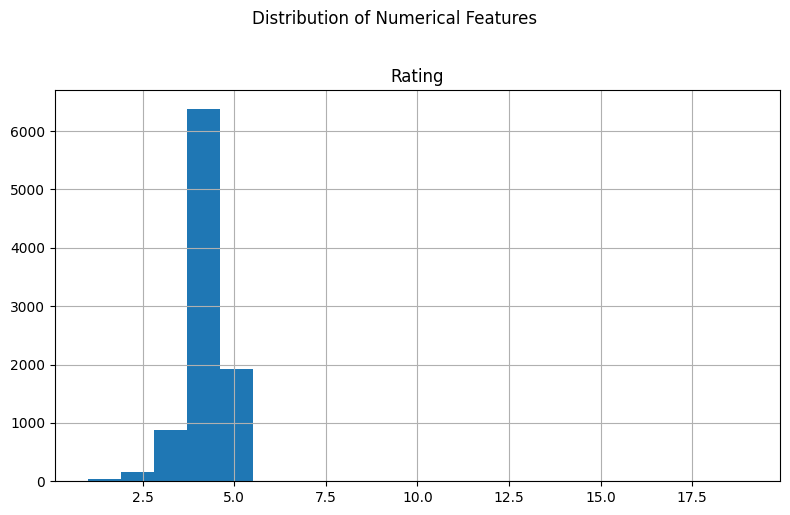

In [15]:
# 1. Distribution of Numerical Features
print("\n--- Distribution of Numerical Features ---")
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
df[numerical_cols].hist(bins=20, figsize=(8, 5))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

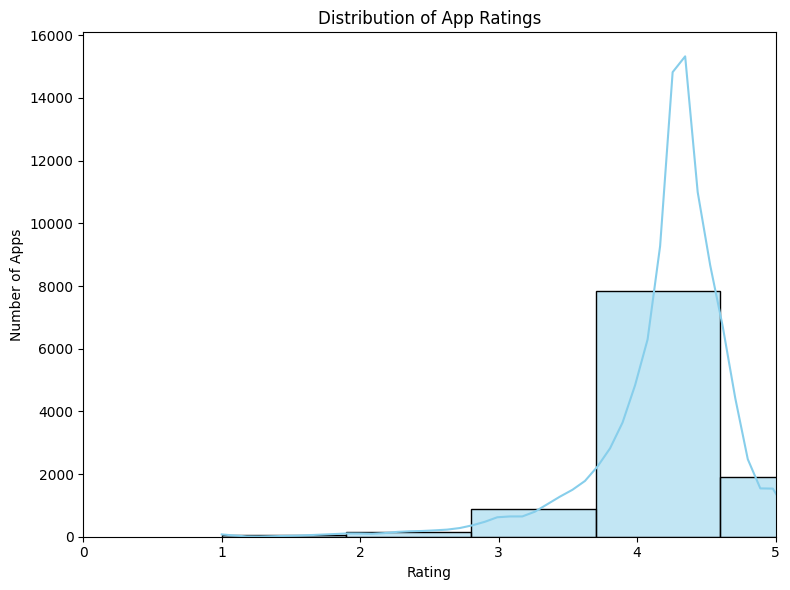

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:315: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:318: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


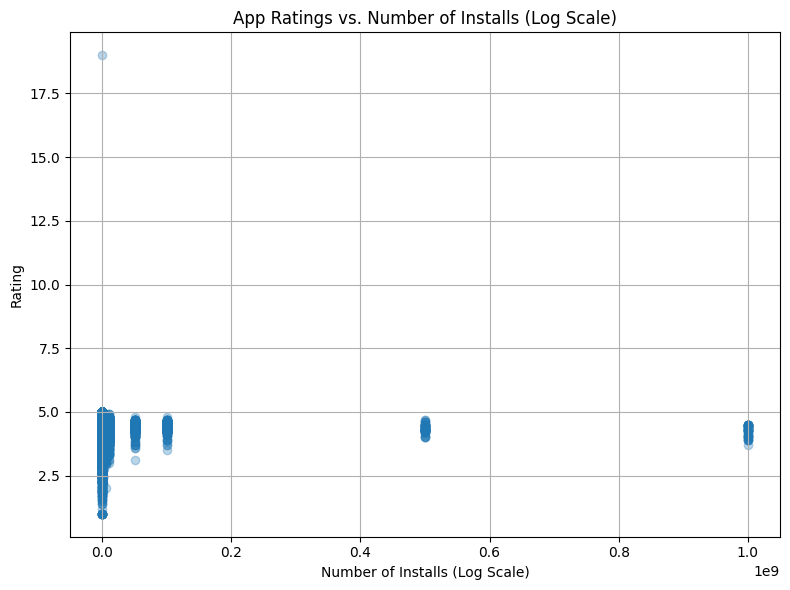

In [37]:
# Download vs Rating
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_cleaned,
    x='Installs',
    y='Rating',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'},
    logx=True
)
plt.title('App Ratings vs. Number of Installs (Log Scale)')
plt.xlabel('Number of Installs (Log Scale)')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


--- Distribution of Categorical Features ---


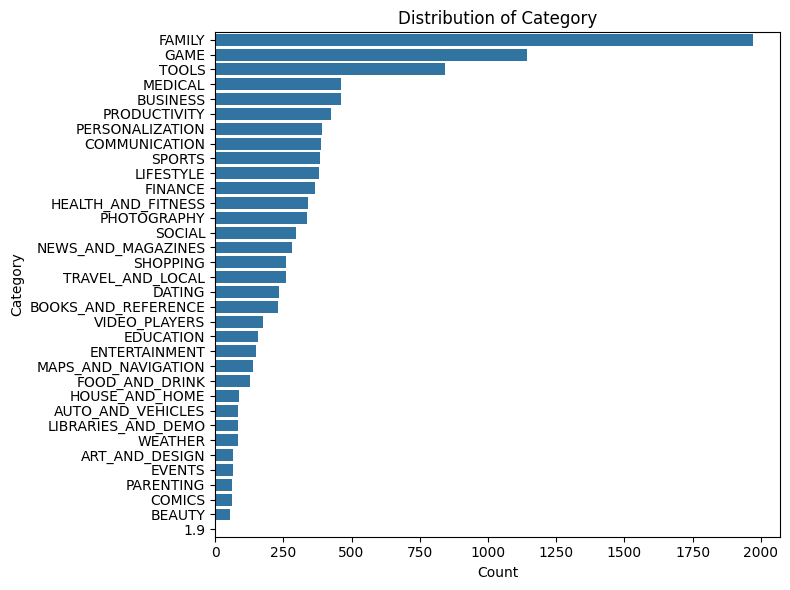

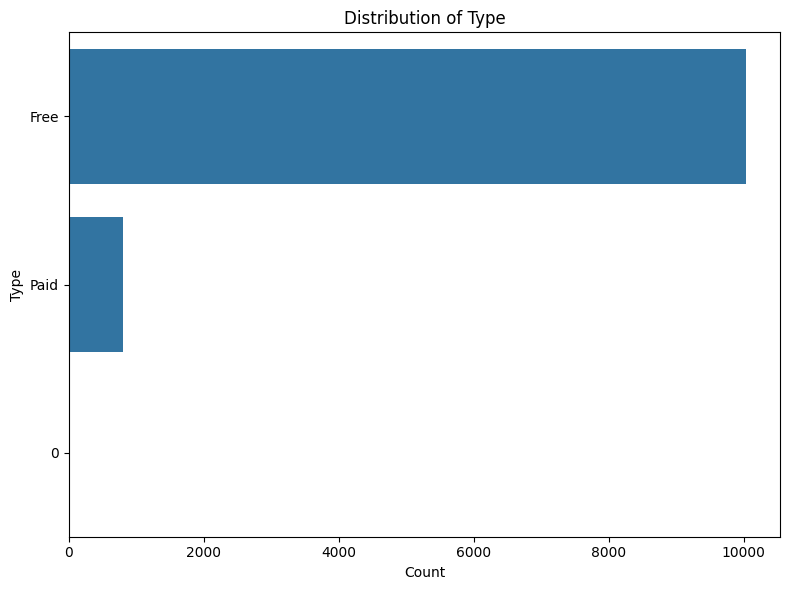

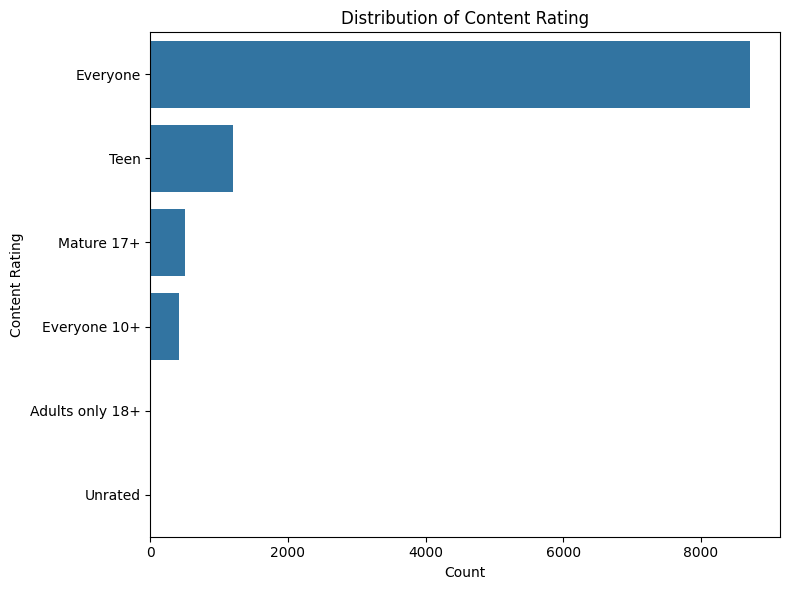

In [38]:
#Distribution of Categorical Features
print("\n--- Distribution of Categorical Features ---")
categorical_cols = ['Category', 'Type', 'Content Rating']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


--- Relationships between Numerical Features ---


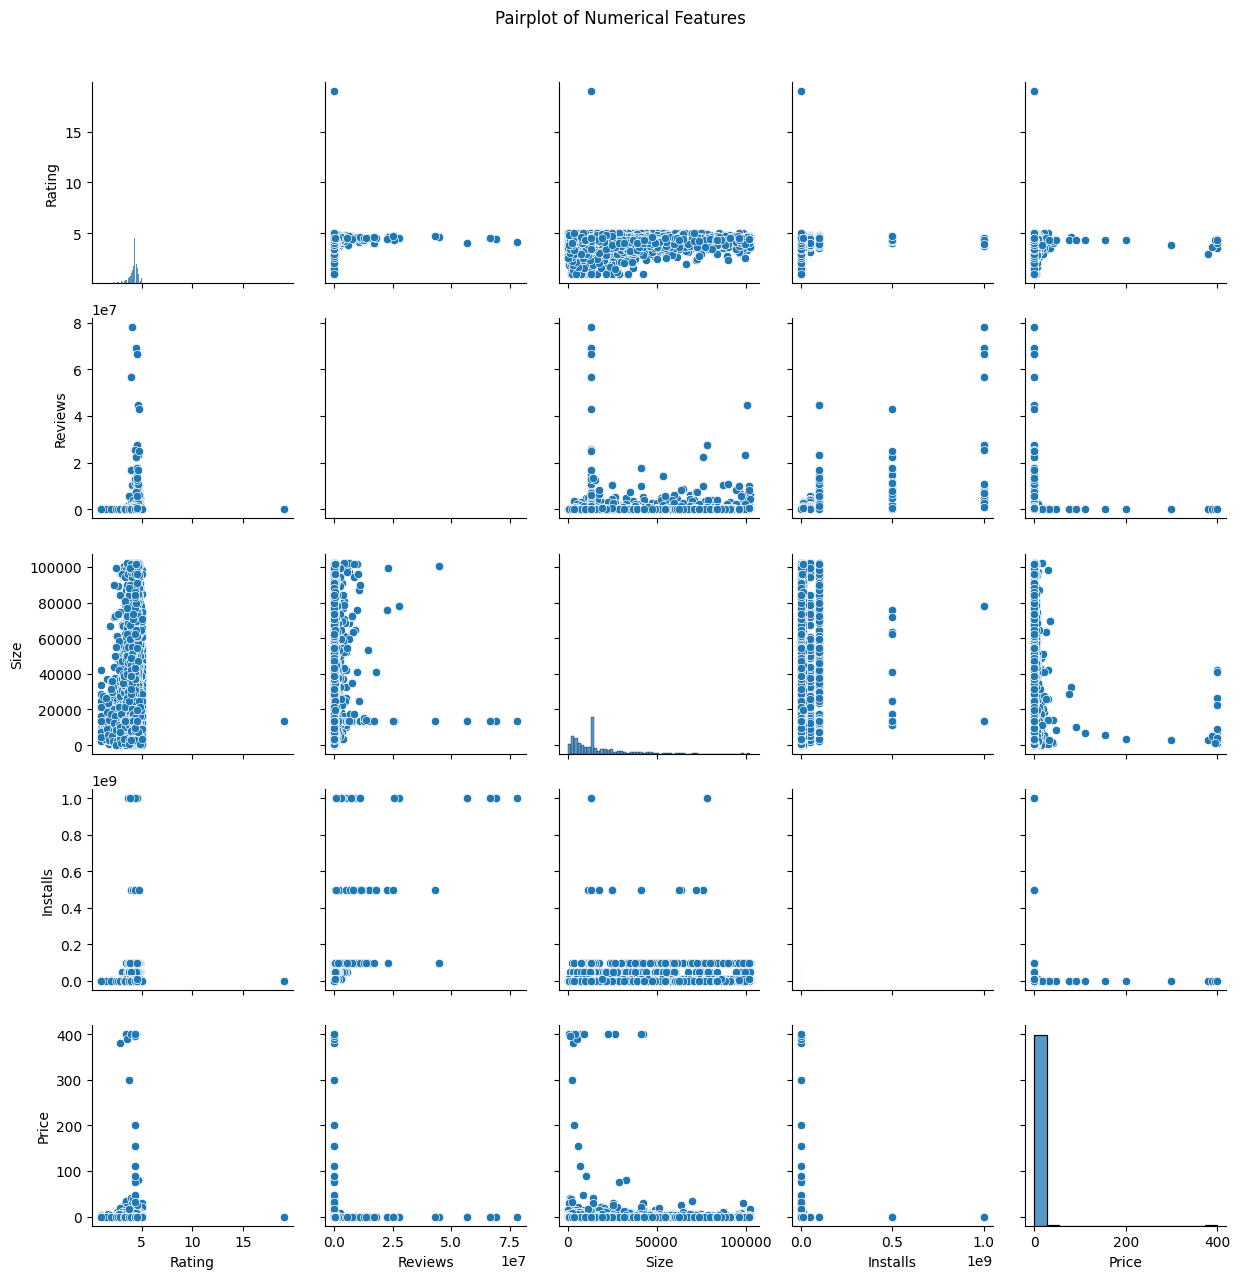

In [39]:
# Relationships between Numerical Features
print("\n--- Relationships between Numerical Features ---")
sns.pairplot(df_cleaned[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

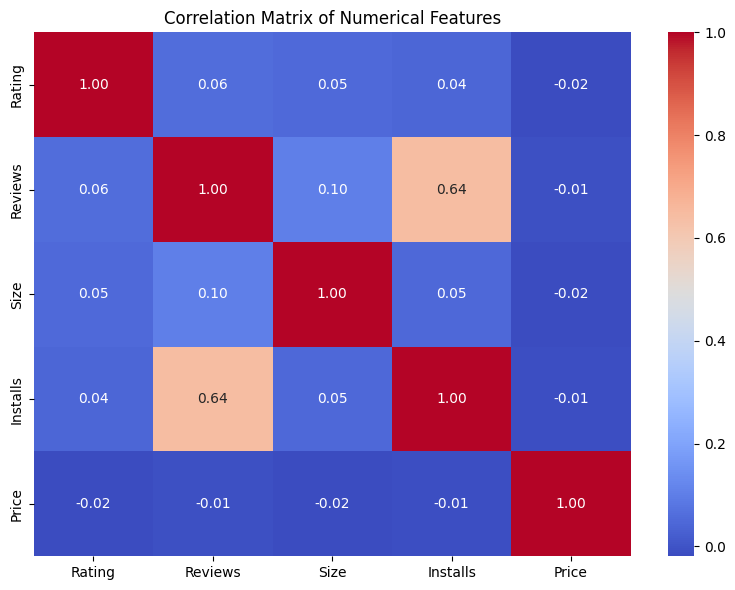

In [21]:
# Correlation heatmap
correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

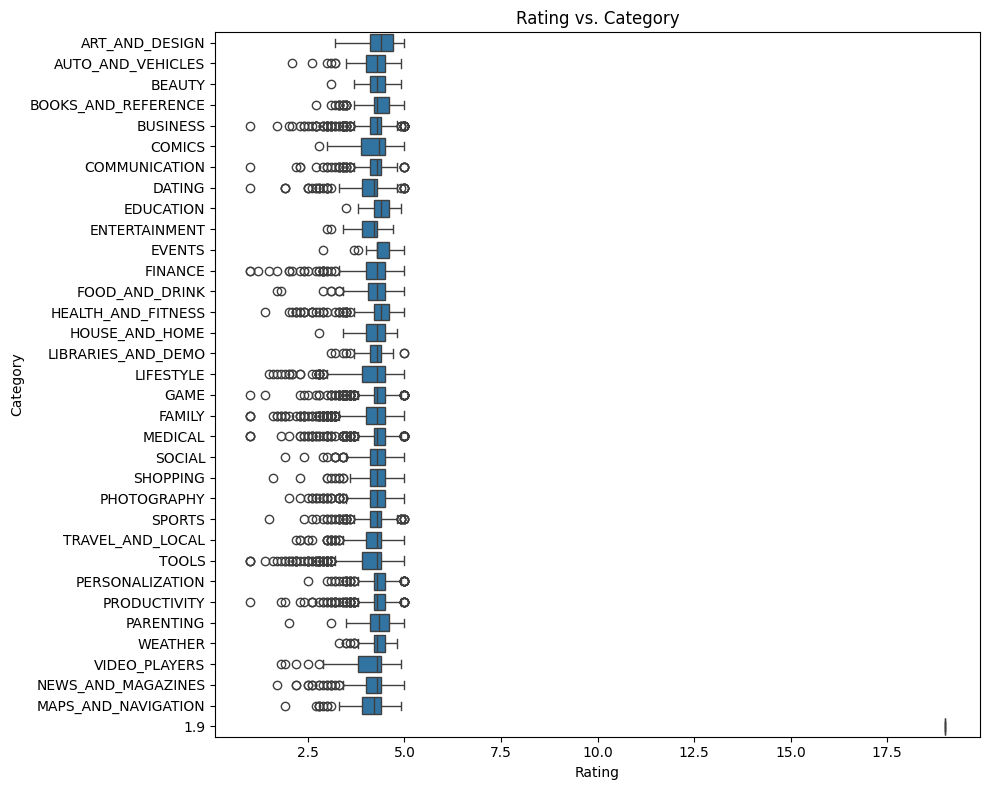

In [25]:
# Box plots of Rating vs. Category, Type, Content Rating
plt.figure(figsize=(10, 8))
sns.boxplot(x='Rating', y='Category', data=df_cleaned)
plt.title('Rating vs. Category')
plt.tight_layout()
plt.show()

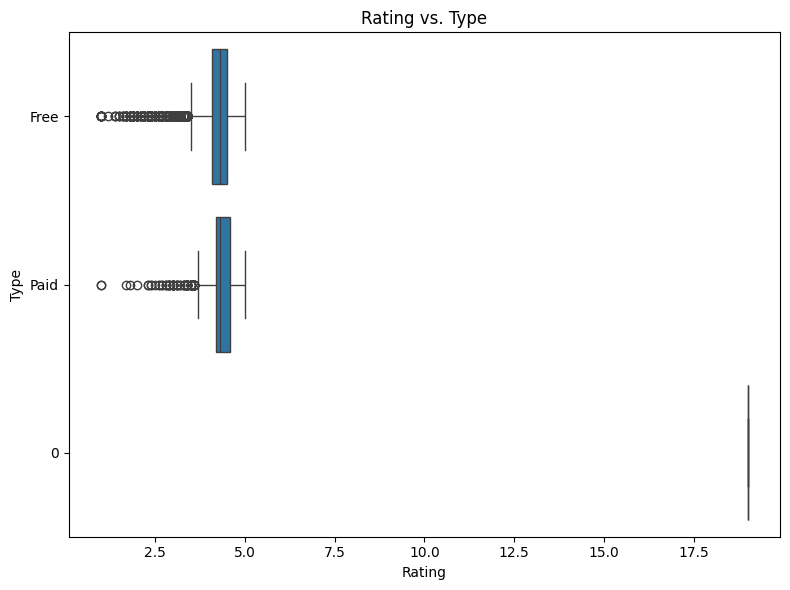

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', y='Type', data=df_cleaned)
plt.title('Rating vs. Type')
plt.tight_layout()
plt.show()

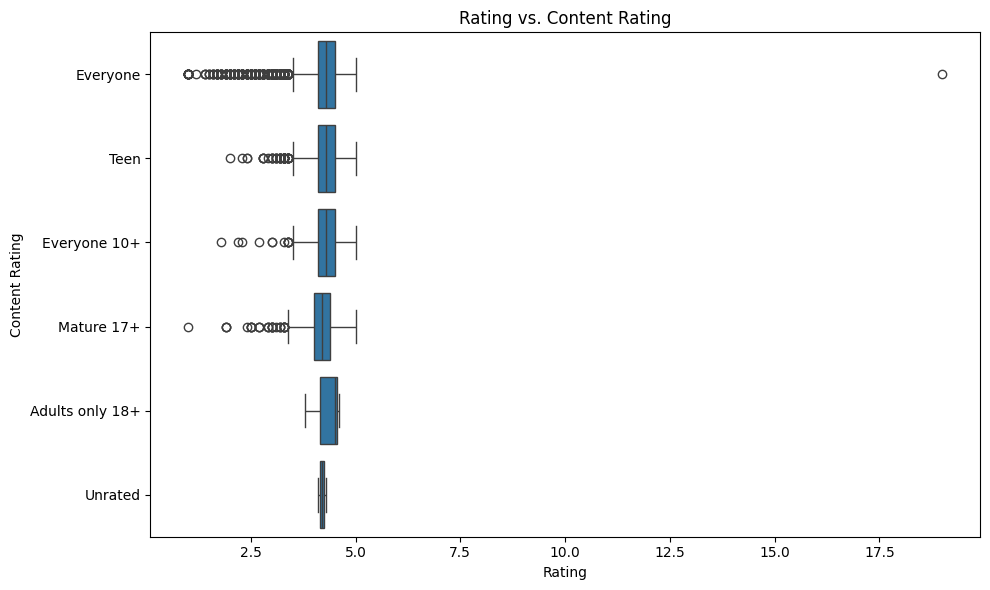

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Content Rating', data=df_cleaned)
plt.title('Rating vs. Content Rating')
plt.tight_layout()
plt.show()

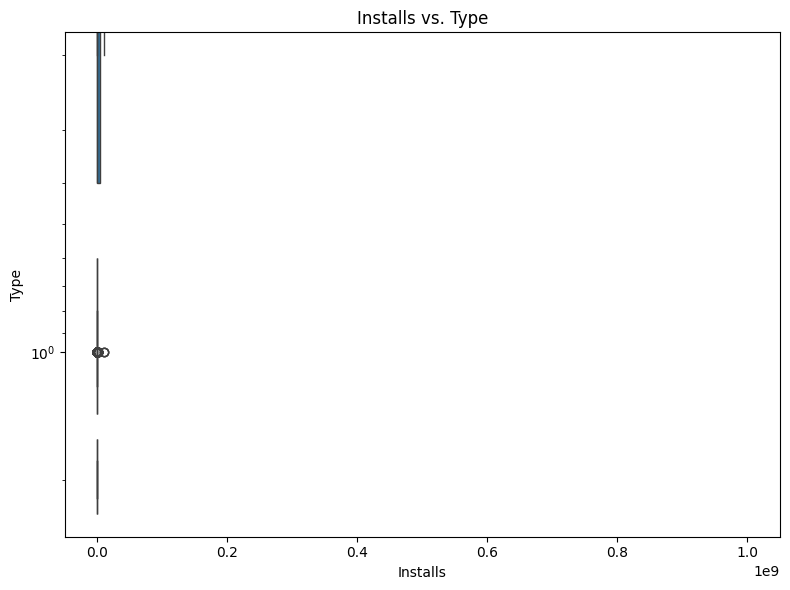

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Installs', y='Type', data=df_cleaned)
plt.title('Installs vs. Type')
plt.yscale('log') # Using a logarithmic scale for better visualization due to large range
plt.tight_layout()
plt.show()


--- Analyzing Size and Installs ---


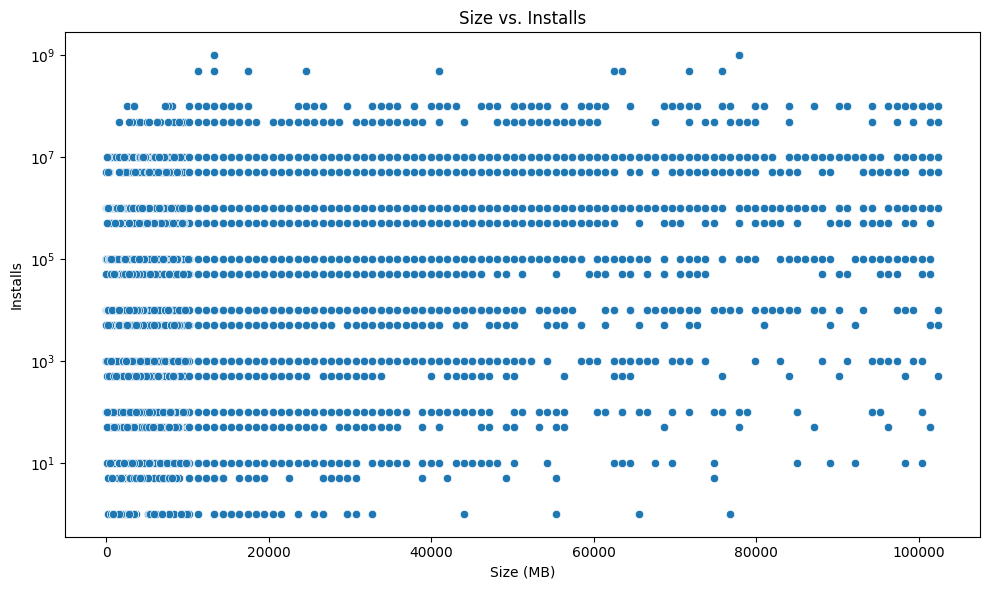

In [31]:
# 5. Analyzing 'Size' and 'Installs'
print("\n--- Analyzing Size and Installs ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs', data=df_cleaned)
plt.title('Size vs. Installs')
plt.xlabel('Size (MB)')
plt.ylabel('Installs')
plt.yscale('log')
plt.tight_layout()
plt.show()


--- Analyzing Price ---


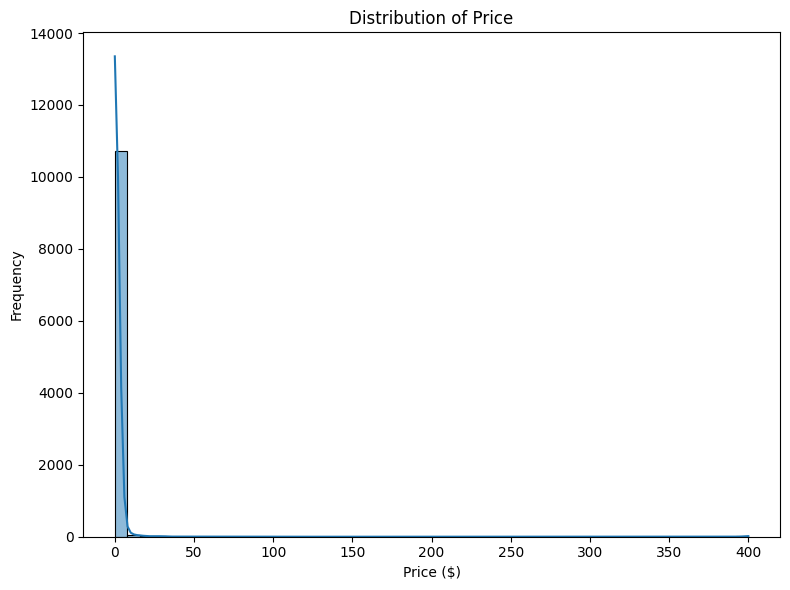

In [32]:
# 6. Analyzing 'Price'
print("\n--- Analyzing Price ---")
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Summary statistics of Price:
count     10841
unique       93
top           0
freq      10040
Name: Price, dtype: object

--- Free vs. Paid Apps Analysis ---

Number of free and paid apps:
Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64


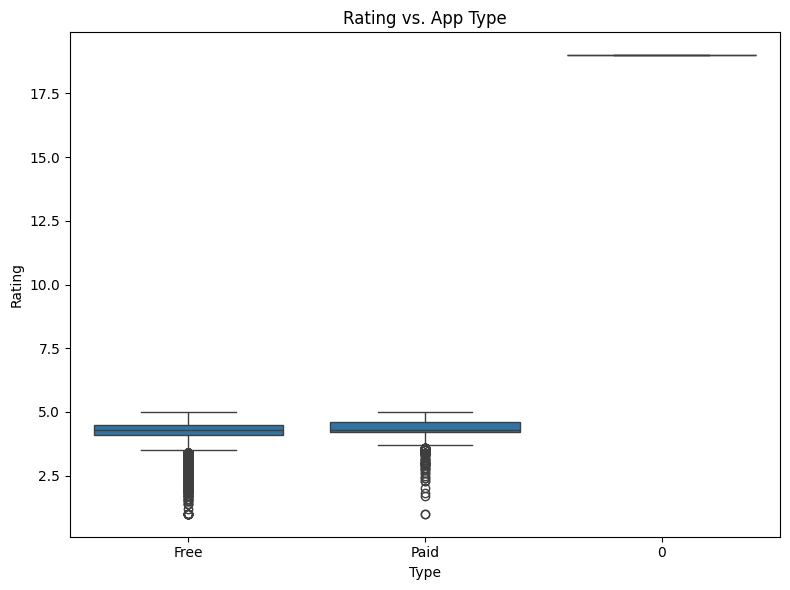

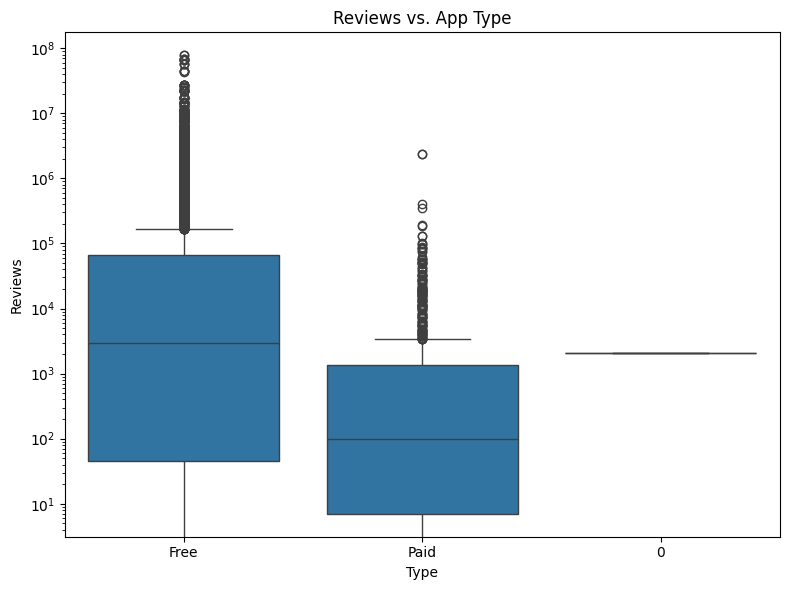

In [33]:
print("\nSummary statistics of Price:")
print(df['Price'].describe())

# Identify and explore free vs. paid apps
print("\n--- Free vs. Paid Apps Analysis ---")
print("\nNumber of free and paid apps:")
print(df['Type'].value_counts())

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Rating', data=df_cleaned)
plt.title('Rating vs. App Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Reviews', data=df_cleaned)
plt.title('Reviews vs. App Type')
plt.yscale('log')
plt.tight_layout()
plt.show()

<ipython-input-41-a2d1683ee5cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


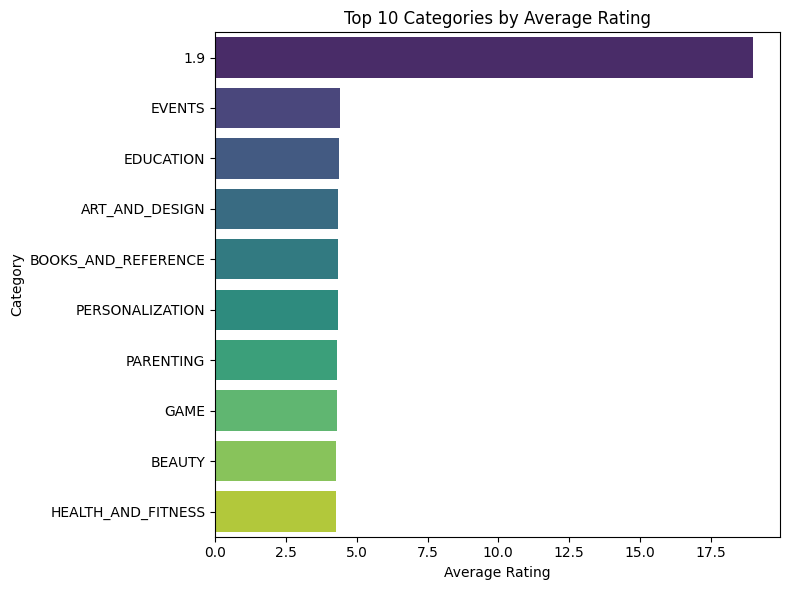

In [41]:
top_categories = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

<ipython-input-43-2f015606464c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_installs.values, y=top_installs.index, palette="magma")


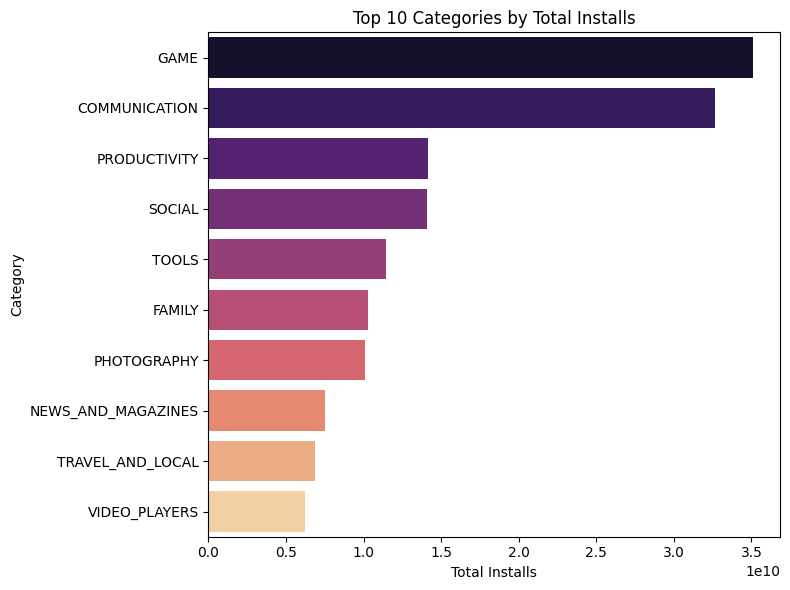

In [43]:
top_installs = df_cleaned.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_installs.values, y=top_installs.index, palette="magma")
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

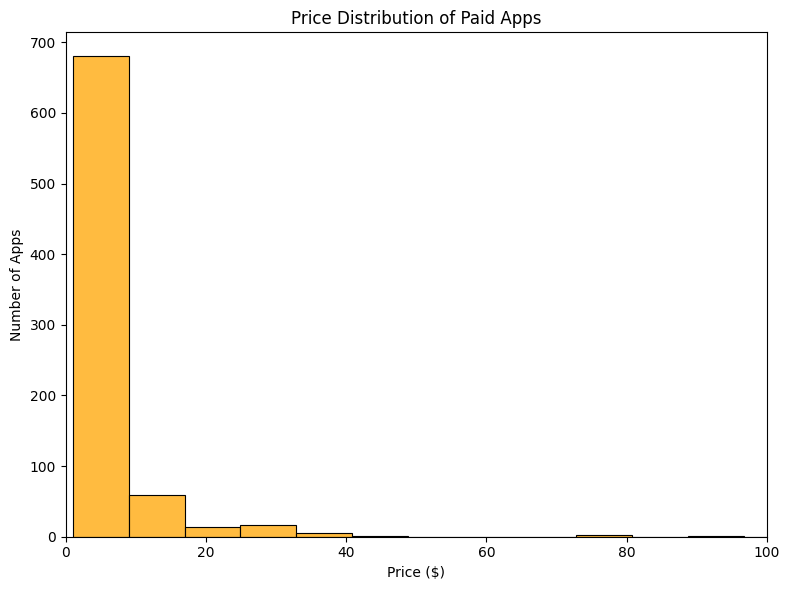

In [44]:
paid_apps = df_cleaned[df_cleaned['Type'] == 'Paid']

plt.figure(figsize=(8, 6))
sns.histplot(paid_apps['Price'], bins=50, color='orange')
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.xlim(0, 100)  # Most paid apps fall within this range
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()

<ipython-input-45-ff858eaca8b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Content Rating', order=df_cleaned['Content Rating'].value_counts().index, palette='Set2')


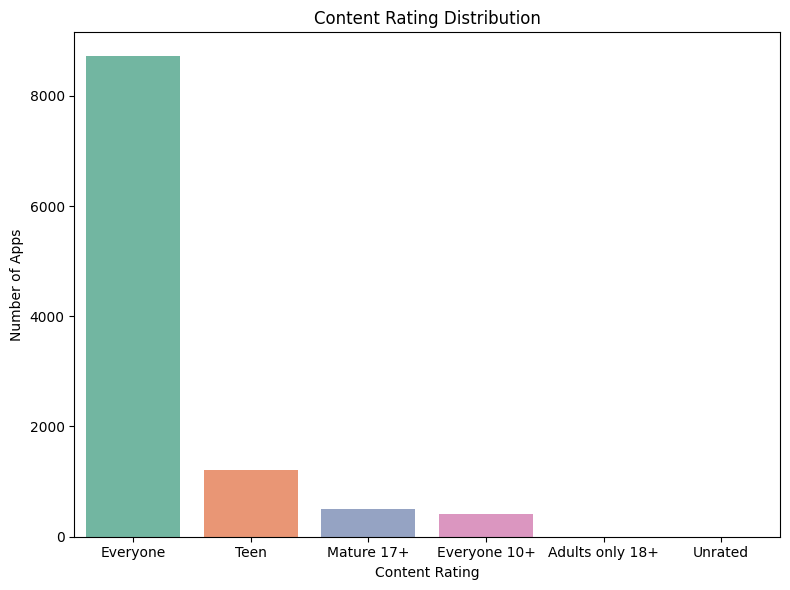

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Content Rating', order=df_cleaned['Content Rating'].value_counts().index, palette='Set2')
plt.title('Content Rating Distribution')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()